# A toy example

In [ ]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt


## Data

[[ 0.25237181]
 [-0.12105531]
 [-0.36943624]
 ...
 [-0.53090992]
 [ 0.15155199]
 [-0.16980654]]


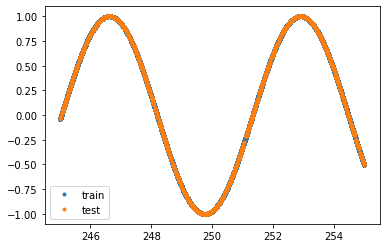

In [ ]:
data = np.random.uniform(size=(64 * 1025, 1), low=-5., high=5.) + 250.

x_train = data[:64*1000, :]
x_test = data[64*1000:, :]

y_train = np.sin(x_train) #+ np.random.normal(size=x_train.shape) / 10.
y_test = np.sin(x_test)

mean_train = np.mean(x_train)
var_train = np.var(x_train)

plt.plot(x_train, y_train, '.')
plt.plot(x_test, y_test, '.')
plt.legend(["train", "test"])

x_train = (x_train - mean_train) / np.sqrt(var_train)
x_test = (x_test - mean_train) / np.sqrt(var_train)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

print(x_train)


## Model

In [ ]:
model = keras.Sequential(
    [
     keras.Input(1, name="input_layer"),
     keras.layers.Dense(32, activation=tf.nn.relu, name="hidden_layer_1"),
     keras.layers.Dense(32, activation=tf.nn.relu, name="hidden_layer_2"),
     #keras.layers.Dense(4, activation=tf.nn.relu, name="hidden_layer_3"),
     #keras.layers.Dense(4, activation=tf.nn.relu, name="hidden_layer_4"),
     keras.layers.Dense(1, name="output_layer")
    ]
)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.RootMeanSquaredError()]
)

## Training

In [ ]:
logdir = "log/toy_example"
tensorboard_callback = keras.callbacks.TensorBoard(logdir)

model.fit(
    train_dataset,
    batch_size=64,
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2173 - root_mean_squared_error: 0.4558 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0317
Epoch 2/10
1000/1000 [==============================] - 1s 1ms/step - loss: 5.0658e-04 - root_mean_squared_error: 0.0220 - val_loss: 2.8237e-05 - val_root_mean_squared_error: 0.0053
Epoch 3/10
1000/1000 [==============================] - 1s 1ms/step - loss: 2.2993e-05 - root_mean_squared_error: 0.0048 - val_loss: 9.8101e-06 - val_root_mean_squared_error: 0.0031
Epoch 4/10
1000/1000 [==============================] - 1s 1ms/step - loss: 1.1080e-05 - root_mean_squared_error: 0.0033 - val_loss: 1.3078e-05 - val_root_mean_squared_error: 0.0036
Epoch 5/10
1000/1000 [==============================] - 1s 1ms/step - loss: 1.1476e-05 - root_mean_squared_error: 0.0034 - val_loss: 2.3696e-05 - val_root_mean_squared_error: 0.0049
Epoch 6/10
1000/1000 [==============================] - 1s 1ms/step - loss: 1.5490e-05 - root_mean

(100,)
(100, 1)


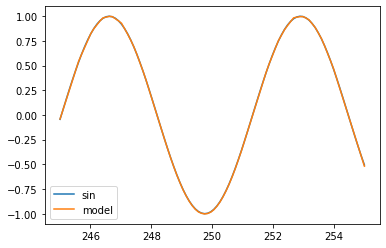

In [ ]:
x = np.linspace(-5., 5., 100) + 250.

plt.plot(x, np.sin(x))

print(x.shape)

x = np.reshape(x, (-1, 1))

print(x.shape)

plt.plot(x, model((x - mean_train)/var_train))

plt.legend(["sin", "model"])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 32)                64        
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 32)                1056      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


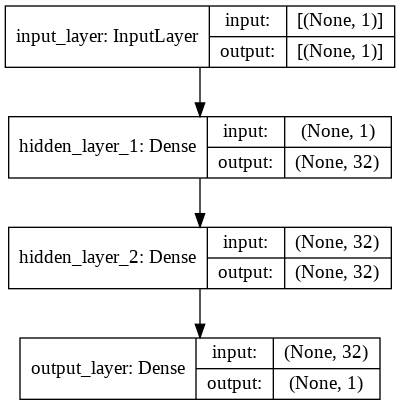

In [ ]:
model.summary()

keras.utils.plot_model(model, "model.png", show_shapes=True)

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir log

In [ ]:
model.save("model/toy_model")
model2 = keras.models.load_model("model/toy_model")

INFO:tensorflow:Assets written to: model/toy_model/assets
